<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/5%EC%A3%BC%EC%B0%A8/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast cancer

- [데이터 설명](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
  

## Load library

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

## Load Data

In [4]:
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Step1. 데이터 탐색 및 준비

### [Q1] 데이터 구조
분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [5]:
breast_cancer_df.shape

(569, 31)

In [6]:
# 데이터프레임의 요약 정보
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### [Q2] 데이터 통계정보
분석할 데이터의 통계정보를 살펴보세요

In [7]:
# 데이터프레임의 통계 정보 
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### [Q3] 분석 유형 확인
분석할 타겟('label')은 몇 가지 종류로 구성되어 있습니까?

In [8]:
breast_cancer_df['label'].unique()

array([0, 1])

### [Q4] 결측치 처리
분석할 데이터에 결측치가 있는지 확인하고, 결측치가 있는 데이터는 삭제하세요

In [9]:
# 결측치 확인
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### [Q5] 데이터 분할


In [10]:
# 독립변수와 종속변수 분할
X = breast_cancer_df.iloc[:, :30]
y = breast_cancer_df['label']


분석할 데이터를 train_test_split()함수를 사용하여 학습용과 테스트용으로 나누세요

In [28]:
from sklearn.model_selection import train_test_split
# 학습용 데이터와 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

print('학습용 데이터 {}개, 테스트용 데이터 {}개'.format(len(X_train), len(X_test)))

학습용 데이터 426개, 테스트용 데이터 143개


## Step2. 학습

### DecisionTreeClassifier
분석할 데이터를 DecisionTreeClassifier를 사용하여 학습을 수행하세요

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

### KNeighborsClassifier


In [13]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_model = KNeighborsClassifier(n_neighbors=5)
neighbor_model.fit(X_train , y_train)

KNeighborsClassifier()

### SVC

In [14]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train , y_train)

SVC()


### RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
forest_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=300, random_state=42)


### LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train , y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)


### GradientBoostingClassifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train , y_train)

GradientBoostingClassifier(random_state=42)


### XGBClassifier

In [18]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

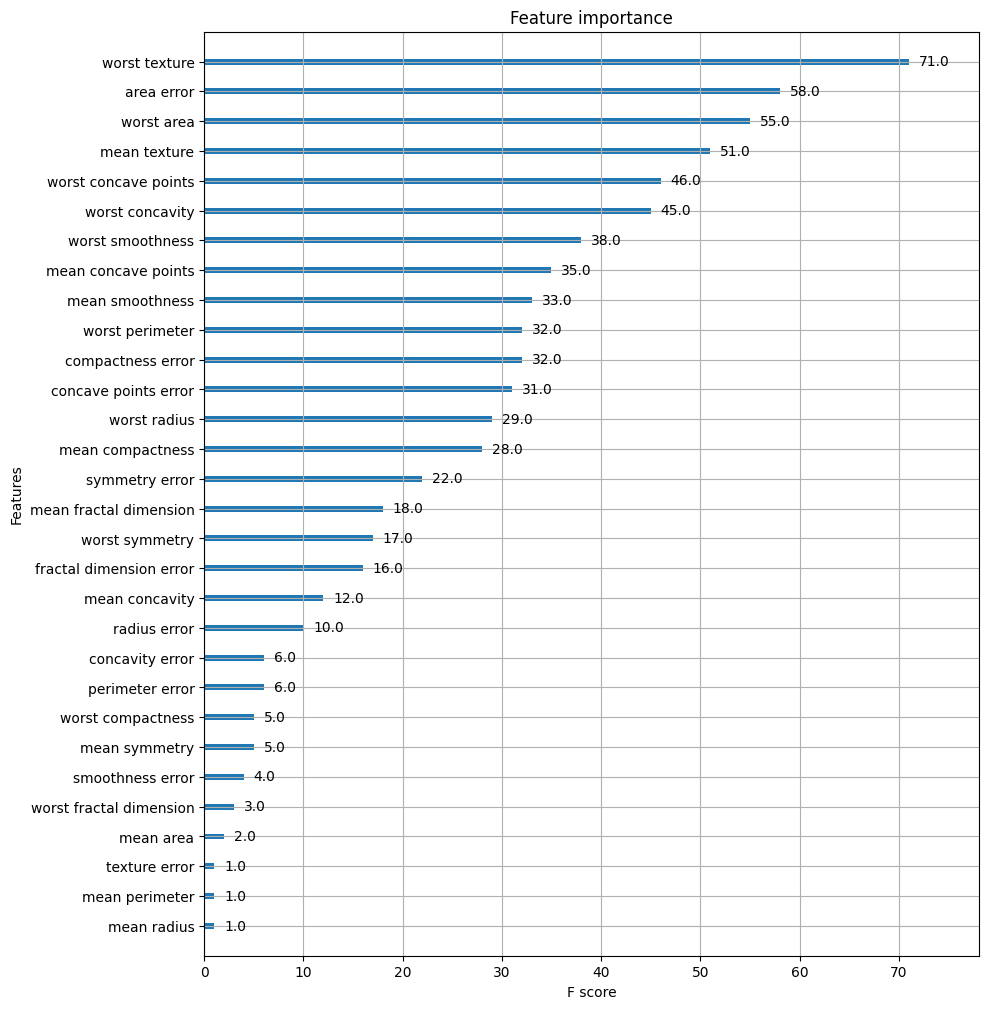

In [19]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)


### LGBMClassifier

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

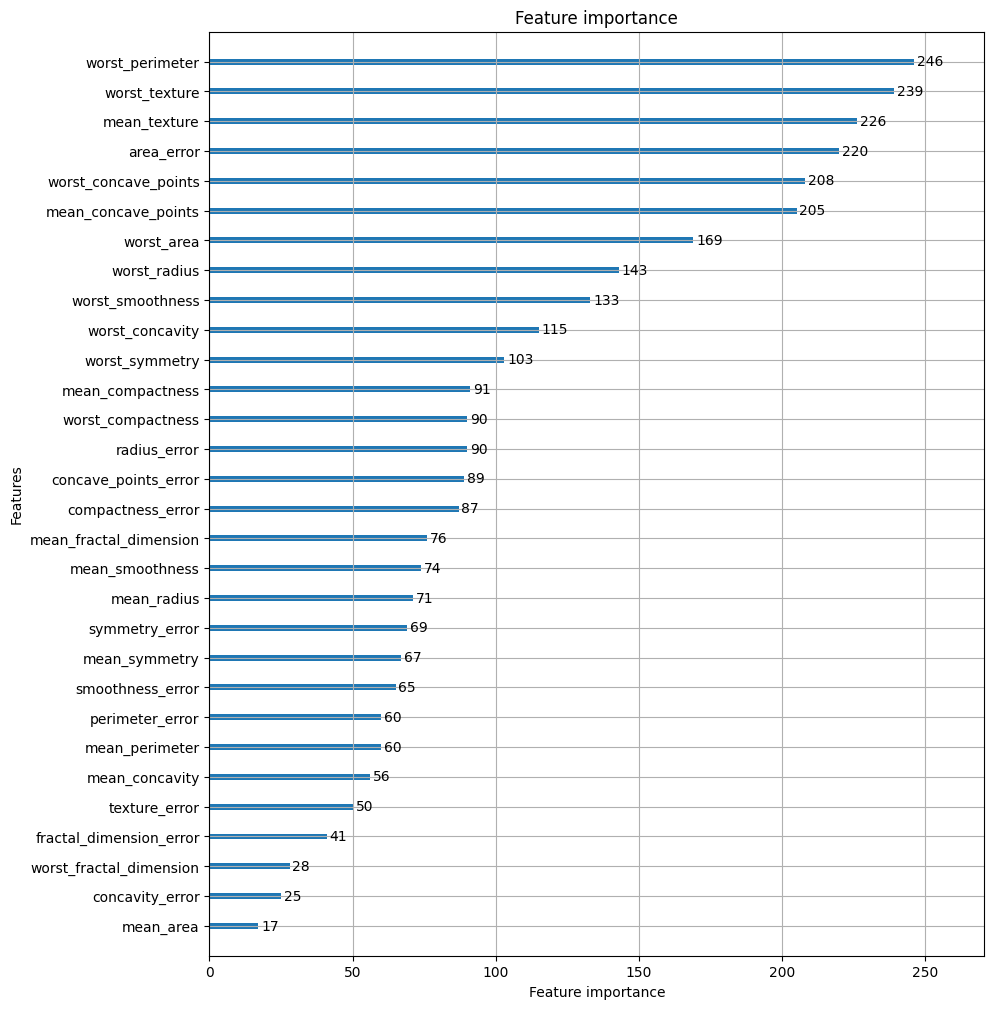

In [20]:
from lightgbm import LGBMClassifier, plot_importance
from lightgbm import plot_importance

lgb_model = LGBMClassifier(n_estimators=300, random_state=42)
lgb_model.fit(X_train , y_train)

# plot_importance()를 이용하여 feature 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_model, ax=ax)

### 평가지표
각 모델의  혼동행렬, 정확도, 정밀도, 재현율, F1 score, AUC를 구하세요


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print('혼동행렬')
    print(confusion)

In [22]:
model_list = [dt_model, neighbor_model, svm_model, forest_model, logistic_model, gbm_model, xgb_model, lgb_model]

for model in model_list:
    pred = model.predict(X_test)
    #accuracy = accuracy_score(y_test, pred)
    model_name = model.__class__.__name__
    print('\n{} 성능지표:'.format(model_name)) 
    get_clf_eval(y_test, pred)


DecisionTreeClassifier 성능지표:
정확도: 0.9301, 정밀도: 0.9540, 재현율: 0.9326, F1: 0.9432
혼동행렬
[[50  4]
 [ 6 83]]

KNeighborsClassifier 성능지표:
정확도: 0.9580, 정밀도: 0.9560, 재현율: 0.9775, F1: 0.9667
혼동행렬
[[50  4]
 [ 2 87]]

SVC 성능지표:
정확도: 0.8951, 정밀도: 0.8627, 재현율: 0.9888, F1: 0.9215
혼동행렬
[[40 14]
 [ 1 88]]

RandomForestClassifier 성능지표:
정확도: 0.9650, 정밀도: 0.9565, 재현율: 0.9888, F1: 0.9724
혼동행렬
[[50  4]
 [ 1 88]]

LogisticRegression 성능지표:
정확도: 0.9580, 정밀도: 0.9663, 재현율: 0.9663, F1: 0.9663
혼동행렬
[[51  3]
 [ 3 86]]

GradientBoostingClassifier 성능지표:
정확도: 0.9650, 정밀도: 0.9468, 재현율: 1.0000, F1: 0.9727
혼동행렬
[[49  5]
 [ 0 89]]

XGBClassifier 성능지표:
정확도: 0.9860, 정밀도: 0.9780, 재현율: 1.0000, F1: 0.9889
혼동행렬
[[52  2]
 [ 0 89]]

LGBMClassifier 성능지표:
정확도: 0.9790, 정밀도: 0.9674, 재현율: 1.0000, F1: 0.9834
혼동행렬
[[51  3]
 [ 0 89]]


## Step3. 성능 개선

### Early stopping - XGBoost

학습 조기 종료 방법을 사용하여 XGBClassifier의 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인

In [23]:
from xgboost import XGBClassifier

xgb_model2 = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
evals = [(X_test, y_test)]
xgb_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=True)
xgb_pred = xgb_model2.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('XGBoost EarlyStopping 정확도: {0:.4f}'.format(xgb_accuracy))

[0]	validation_0-logloss:0.61549
[1]	validation_0-logloss:0.55139
[2]	validation_0-logloss:0.50028
[3]	validation_0-logloss:0.45620
[4]	validation_0-logloss:0.41229
[5]	validation_0-logloss:0.37561
[6]	validation_0-logloss:0.34201
[7]	validation_0-logloss:0.31301
[8]	validation_0-logloss:0.28677
[9]	validation_0-logloss:0.26393
[10]	validation_0-logloss:0.24362
[11]	validation_0-logloss:0.22590
[12]	validation_0-logloss:0.21163
[13]	validation_0-logloss:0.19757
[14]	validation_0-logloss:0.18544


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.17511
[16]	validation_0-logloss:0.16540
[17]	validation_0-logloss:0.15615
[18]	validation_0-logloss:0.14892
[19]	validation_0-logloss:0.14087
[20]	validation_0-logloss:0.13504
[21]	validation_0-logloss:0.12931
[22]	validation_0-logloss:0.12347
[23]	validation_0-logloss:0.11678
[24]	validation_0-logloss:0.11227
[25]	validation_0-logloss:0.10812
[26]	validation_0-logloss:0.10391
[27]	validation_0-logloss:0.10033
[28]	validation_0-logloss:0.09646
[29]	validation_0-logloss:0.09382
[30]	validation_0-logloss:0.09109
[31]	validation_0-logloss:0.08894
[32]	validation_0-logloss:0.08564
[33]	validation_0-logloss:0.08311
[34]	validation_0-logloss:0.08135
[35]	validation_0-logloss:0.07969
[36]	validation_0-logloss:0.07721
[37]	validation_0-logloss:0.07648
[38]	validation_0-logloss:0.07327
[39]	validation_0-logloss:0.07199
[40]	validation_0-logloss:0.07076
[41]	validation_0-logloss:0.07038
[42]	validation_0-logloss:0.06871
[43]	validation_0-logloss:0.06722
[44]	validatio

### Early stopping - LGBM
학습 조기 종료 방법을 사용하여 LGBMClassifier 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인해봅니다 

In [24]:
from lightgbm import LGBMClassifier

lgb_model2 = LGBMClassifier(n_estimators=300, random_state=42)
evals = [(X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=True)
lgb_pred = lgb_model2.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
print('LGBMClassifier EarlyStopping 정확도: {0:.4f}'.format(lgb_accuracy))

[1]	valid_0's binary_logloss: 0.58467
[2]	valid_0's binary_logloss: 0.522692
[3]	valid_0's binary_logloss: 0.469942
[4]	valid_0's binary_logloss: 0.426191
[5]	valid_0's binary_logloss: 0.38678
[6]	valid_0's binary_logloss: 0.350754
[7]	valid_0's binary_logloss: 0.322384
[8]	valid_0's binary_logloss: 0.29448
[9]	valid_0's binary_logloss: 0.270879
[10]	valid_0's binary_logloss: 0.253474
[11]	valid_0's binary_logloss: 0.234085
[12]	valid_0's binary_logloss: 0.216071
[13]	valid_0's binary_logloss: 0.203645
[14]	valid_0's binary_logloss: 0.190993
[15]	valid_0's binary_logloss: 0.178996
[16]	valid_0's binary_logloss: 0.167861
[17]	valid_0's binary_logloss: 0.159976
[18]	valid_0's binary_logloss: 0.150152
[19]	valid_0's binary_logloss: 0.141688
[20]	valid_0's binary_logloss: 0.132145
[21]	valid_0's binary_logloss: 0.126037
[22]	valid_0's binary_logloss: 0.118704
[23]	valid_0's binary_logloss: 0.112274
[24]	valid_0's binary_logloss: 0.107005
[25]	valid_0's binary_logloss: 0.102923
[26]	valid_0

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[64]	valid_0's binary_logloss: 0.0627863
[65]	valid_0's binary_logloss: 0.0626865
[66]	valid_0's binary_logloss: 0.0626608
[67]	valid_0's binary_logloss: 0.0640082
[68]	valid_0's binary_logloss: 0.0646423
[69]	valid_0's binary_logloss: 0.0648492
[70]	valid_0's binary_logloss: 0.0631471
[71]	valid_0's binary_logloss: 0.0635314
[72]	valid_0's binary_logloss: 0.0628524
[73]	valid_0's binary_logloss: 0.0638194
[74]	valid_0's binary_logloss: 0.0631848
[75]	valid_0's binary_logloss: 0.0633369
[76]	valid_0's binary_logloss: 0.0632126
[77]	valid_0's binary_logloss: 0.0634581
[78]	valid_0's binary_logloss: 0.0644985
[79]	valid_0's binary_logloss: 0.0633665
[80]	valid_0's binary_logloss: 0.0635355
[81]	valid_0's binary_logloss: 0.0626744
[82]	valid_0's binary_logloss: 0.0623555
[83]	valid_0's binary_logloss: 0.0624902
[84]	valid_0's binary_logloss: 0.0615779
[85]	valid_0's binary_logloss: 0.0625718
[86]	valid_0's binary_logloss: 0.0632274
[87]	valid_0's binary_logloss: 0.062391
[88]	valid_0's bi

### VotingClassifier
앙상블 모델을 생성/학습/평가하세요.
 * 개별 모델 : LogisticRegression, KNeighborsClassifier 조합
 * voting='soft'

In [25]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('LR',logistic_model),\
                                            ('KNN',neighbor_model)] , voting='soft' )
voting_model.fit(X_train , y_train)
pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('VotingClassifier 정확도: {0:.4f}'.format(accuracy))

VotingClassifier 정확도: 0.9580


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### GridSearchCV - RandomForestClassifier

RandomForestClassifier의 하이퍼파라미터를 튜닝하세요
 *     'n_estimators':[100],
 *   'max_depth' : [6, 8, 10, 12], 
 *   'min_samples_leaf' : [8, 12, 18 ],
 *   'min_samples_split' : [8, 16, 20]

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9437


### GridSearchCV - GBM

GBM의 하이퍼파라미터를 튜닝하세요

    * 'n_estimators':[100, 500],
    * 'learning_rate' : [ 0.05, 0.1]

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gbm_model = GradientBoostingClassifier(random_state=10)

grid_cv = GridSearchCV(gbm_model , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9531
